# SAVE TO NCFILE (XARRAY)
---
July 6th, 2023 @irfansmf

---

### Import Module

In [27]:
# Make sure the environment is good
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from netCDF4 import Dataset
import xarray as xr

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import from_levels_and_colors

In [28]:
file_path = 'Data/WRF_output.nc'

nc = xr.open_dataset(file_path)
nc

<xarray.Dataset>
Dimensions:    (latitude: 243, longitude: 213)
Coordinates:
  * latitude   (latitude) float32 -7.872 -7.863 -7.854 ... -5.712 -5.703 -5.694
  * longitude  (longitude) float32 106.6 106.6 106.6 106.6 ... 108.5 108.5 108.5
Data variables:
    Landmask   (latitude, longitude) float32 ...
    Terrain    (latitude, longitude) float32 ...
    Theta_e    (latitude, longitude) float32 ...
    U10        (latitude, longitude) float32 ...
    V10        (latitude, longitude) float32 ...

In [29]:
lat = nc.variables['latitude'].values
lon = nc.variables['longitude'].values

terrain = nc.variables['Terrain'].values
landmask = nc.variables['Landmask'].values

Text(1.0, 1.0, 'Elevation Pict')

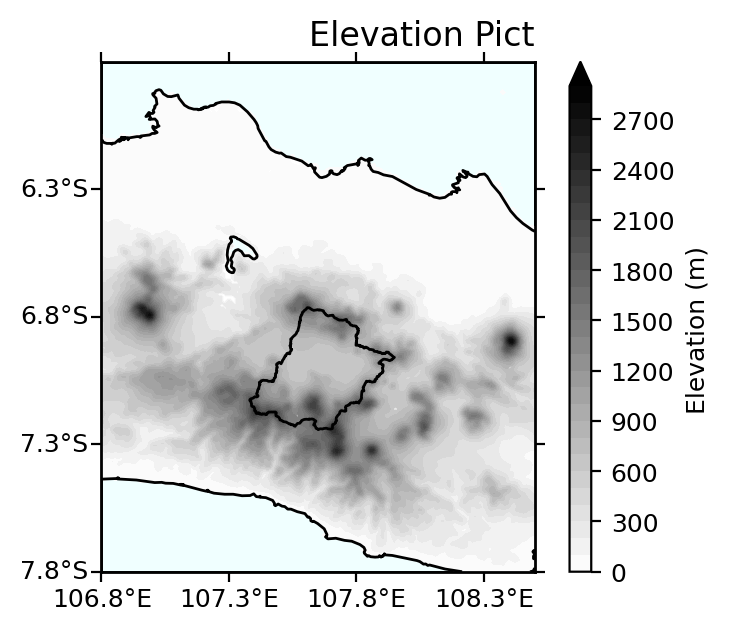

In [30]:
bm = Basemap(projection='cyl',llcrnrlon=106.8,llcrnrlat=-7.8,urcrnrlon=108.5,urcrnrlat=-5.8,resolution='h',suppress_ticks=False)
x,y = np.meshgrid(lon,lat)
x,y = bm(x,y)

fig= plt.figure(figsize=(10.5,8.5), dpi=200)
axA1 = fig.add_axes([0, 0, 1.5, 0.3]) 

bm.drawcoastlines(linewidth=1)
bm.readshapefile('E:/TESIS/Data/Citarum Hulu GCS/Citarum Hulu GCS/Citarum Hulu', 'Citarum Hulu', linewidth=1)
bm.fillcontinents(color='white',lake_color='azure')

bm.drawmapboundary(color='k', linewidth=1.0, fill_color='azure', zorder=None, ax=None)

# Add Long and Lat
lat_ticks = np.arange(-7.8,-5.8,0.5)
lon_ticks = np.arange(106.8,108.5,0.5)
lon_ticks_proj, _=bm(lon_ticks, np.zeros(len(lon_ticks)))
_, lat_ticks_proj=bm(np.zeros(len(lat_ticks)), lat_ticks)
# manually add ticks
axA1.set_xticks(lon_ticks_proj)
axA1.set_yticks(lat_ticks_proj)
axA1.tick_params(axis='both',which='major')
# add ticks to the opposite side as well
axA1.xaxis.set_ticks_position('both')
axA1.yaxis.set_ticks_position('both')
# remove the tick labels
axA1.xaxis.set_ticklabels([])
axA1.yaxis.set_ticklabels([])
bm.drawparallels(lat_ticks,labels=[1,0,0,0],linewidth=0,fontsize=9,
        xoffset=0.03*abs(bm.xmax-bm.xmin)) # need to enlarge the offset a bit
bm.drawmeridians(lon_ticks,labels=[0,0,0,1],linewidth=0,fontsize=9,
        yoffset=0.03*abs(bm.ymax-bm.ymin)) # need to enlarge the offset a bit

# Elevation
hgt_levels = np.arange(0., 3000., 100.)
contourf = bm.colorbar(bm.contourf(x,y,terrain*landmask, levels=hgt_levels, cmap='binary', extend='max'), 
                       location='right', size='5%', pad='8%')
contourf.set_label('Elevation (m)',fontsize=9)
contourf.ax.tick_params(labelsize=9)
plt.title('Elevation Pict' , loc='right', fontsize=12)